In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
dataset_dir = '../Data/'
dataset_name = 'other_ahu_points'

# dataset_dir = os.path.join(dataset_dir, dataset_name)
ahus = pd.read_csv(os.path.join(dataset_dir, dataset_name+'.csv'), index_col=0)
ahus.shape

(43, 22)

In [3]:
df = ahus.drop(columns=['Component', 'Subsystem', 'Metric'])
counts = df.count(axis='columns')
counts_sorted = counts.sort_values(ascending=False)

In [4]:
testhall_points = ['Air heater - pump operating message', 'Air re-heater - pump operating message', 'Air cooler - operating message', 'Air cooler - pump operating message',
                   'Air heater - operating message', 'Air re-heater - operating message', 'Supply fan - speed', 'Supply fan - volume flow',
                   'Outside air temperature (weather station)', 'Outside air temperature (AHU)', 'Extract air temperature', 'Exhaust air temperature',
                   'Supply air temperature', 'Supply air temperature setpoint', 'Air re-heater - valve control signal', 'Air heater - valve control signal',
                   'Air cooler - valve control signal', 'Outside air relative humidity', 'Supply air relative humidity']

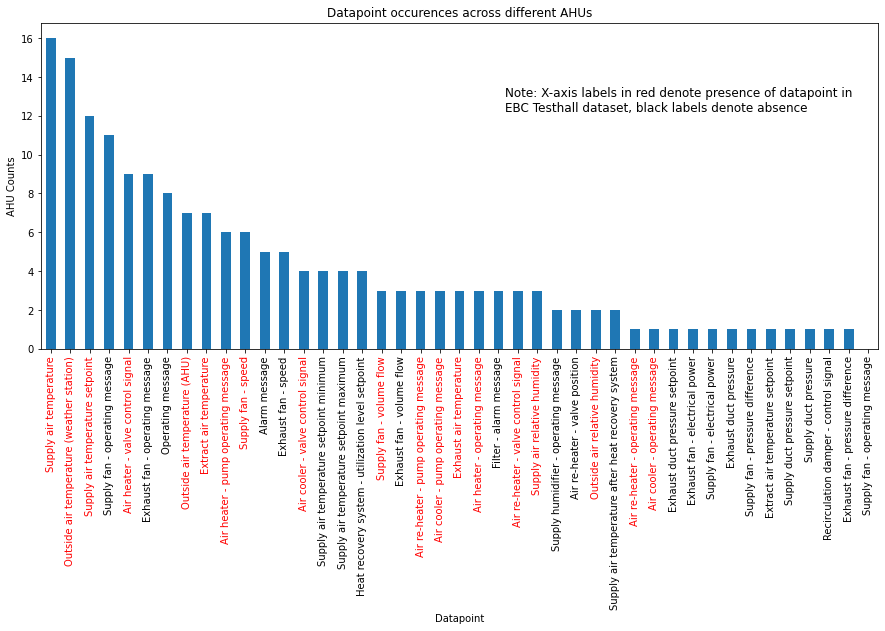

In [7]:
import matplotlib.pyplot as plt

# plt.xticks(rotation=90)
fig = plt.figure(figsize=(15, 6)) 
ax = counts_sorted.plot.bar(rot=90)

ax.set_xlabel('Datapoint')
ax.set_ylabel('AHU Counts')
ax.set_title('Datapoint occurences across different AHUs')

xtick_labels = []
for i in range(len(ax.get_xticklabels())):
    xtick_labels.append(ax.get_xticklabels()[i].get_text())
custom_colors = ['red' if label in testhall_points else 'black' for label in xtick_labels]
for i in range(len(ax.get_xticklabels())):
    ax.get_xticklabels()[i].set_color(custom_colors[i])
# ax.tick_params(axis='x', which='major', pad=20)

# Add a text field
multiline_text = 'Note: X-axis labels in red denote presence of datapoint in\nEBC Testhall dataset, black labels denote absence'
ax.text(len(ax.get_xticklabels()) * 0.75, max(counts_sorted) * 0.8, multiline_text, fontsize=12, ha='center', va='center', multialignment='left')

plt.gcf().set_facecolor('white')

plt.savefig('Figures/foo.png', bbox_inches='tight', dpi=300)